# Data Exploration

This is the first part of the project, where I explore and understand the basics of the data

## Imports

In [1]:
import pandas as pd

## Loading data

In [2]:
# This is the cell for defining constants used throughout the notebook

# Data path
PATH = 'data/'

# Files
FILEPATHS = {
    'consumer_price_index' : 'SYB65_128_202209_Consumer Price Index.csv',
    'employment' : 'SYB65_200_202209_Employment.csv',
    'gdp' : 'SYB65_230_202209_GDP and GDP Per Capita.csv',
    'education_expenditure' : 'SYB65_245_202209_Public expenditure on education.csv',
    'research' : 'SYB65_285_202209_Research and Development Staff.csv',
    'education' : 'SYB65_309_202209_Education.csv',
    'teaching_staff' : 'SYB65_323_202209_Teaching Staff in education.csv',
    'crimes' : 'SYB65_328_202209_Intentional homicides and other crimes.csv',
    'labour_force_and_unemployment' : 'SYB65_329_202209_Labour Force and Unemployment.csv'
}

# Amount of rows read from each file
NROWS = 10000

SKIPPED_SERIES = [
    
]

## Getting columns
Here I get the columns of every file

In [3]:
for file in FILEPATHS.values():
    filepath = PATH + file
    df = pd.read_csv(filepath, nrows=1)
    print(list(df.columns))
    

['T20', 'Consumer Price Index', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6']
['T19', 'Employment by economic activity', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6']
['T14', 'Gross domestic product and gross domestic product per capita', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6']
['T10', 'Public Expenditure on Education (2021)', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6']
['T26', 'Population employed in research and development (R&D)', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6']
['T08', 'Enrolment in primary, secondary and tertiary education levels', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6']
['T09', 'Teaching staff at the primary, secondary and upper secondary levels', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6']
['T13', 'Intentional homicides and other crimes', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unn

After manually analysing the data, I found out that the first row of the data is somewhat the title of the file, so we just ignore the first row

In [4]:
for file in FILEPATHS.values():
    filepath = PATH + file
    df = pd.read_csv(filepath, nrows=1, skiprows=1)
    print(list(df.columns))

['Region/Country/Area', 'Unnamed: 1', 'Year', 'Series', 'Value', 'Footnotes', 'Source']
['Region/Country/Area', 'Unnamed: 1', 'Year', 'Series', 'Value', 'Footnotes', 'Source']
['Region/Country/Area', 'Unnamed: 1', 'Year', 'Series', 'Value', 'Footnotes', 'Source']
['Region/Country/Area', 'Unnamed: 1', 'Year', 'Series', 'Value', 'Footnotes', 'Source']
['Region/Country/Area', 'Unnamed: 1', 'Year', 'Series', 'Value', 'Footnotes', 'Source']
['Region/Country/Area', 'Unnamed: 1', 'Year', 'Series', 'Value', 'Footnotes', 'Source']
['Region/Country/Area', 'Unnamed: 1', 'Year', 'Series', 'Value', 'Footnotes', 'Source']
['Region/Country/Area', 'Unnamed: 1', 'Year', 'Series', 'Value', 'Footnotes', 'Source']
['Region/Country/Area', 'Unnamed: 1', 'Year', 'Series', 'Value', 'Footnotes', 'Source']


While analysing why the 'Unnamed: 1' column, found out that the first and second column labels are connected, with the first column being the region index and the second column being the 'Region/Country/Area' name

Correction: actually, the data is formated in a very different way, with the 'column name' being in the column 'series'. I'm not sure anymore of how easy this is to fix. However, we don't need to fix it just yet, we can first look at how many unique values are in the column 'series'

In [5]:
for file in FILEPATHS.values():
    filepath = PATH + file
    df = pd.read_csv(filepath, skiprows=1, usecols=['Series'])
    print(f"{file[17:]}: {len(df['Series'].unique())}")

Consumer Price Index.csv: 2
Employment.csv: 9
GDP and GDP Per Capita.csv: 4
Public expenditure on education.csv: 7
Research and Development Staff.csv: 7
Education.csv: 9
Teaching Staff in education.csv: 6
Intentional homicides and other crimes.csv: 8
Labour Force and Unemployment.csv: 6


Now for what such values are:

In [6]:
def get_dataset_values(file):
    filepath = PATH + FILEPATHS[file]
    df = pd.read_csv(filepath, skiprows=1, usecols=['Series'])
    print(f'{file}:')
    for item in df['Series'].unique():
        print(f'    {item}')

In [7]:
# Consumer Price Index
get_dataset_values('consumer_price_index')

consumer_price_index:
    Consumer price index: General
    Consumer price index: Food


In [8]:
# Employment
get_dataset_values('employment')

employment:
    Employment by industry: Agriculture (%) Male and Female
    Employment by industry: Industry (%) Male and Female
    Employment by industry: Services (%) Male and Female
    Employment by industry: Agriculture (%) Male
    Employment by industry: Industry (%) Male
    Employment by industry: Services (%) Male
    Employment by industry: Agriculture (%) Female
    Employment by industry: Industry (%) Female
    Employment by industry: Services (%) Female


In [9]:
# GDP and GDP per Capita
get_dataset_values('gdp')

gdp:
    GDP in current prices (millions of US dollars)
    GDP per capita (US dollars)
    GDP in constant 2010 prices (millions of US dollars)
    GDP real rates of growth (percent)


In [10]:
# Consumer Price Index
get_dataset_values('education_expenditure')

education_expenditure:
    Current expenditure other than staff compensation as % of total expenditure in public institutions (%)
    All staff compensation as % of total expenditure in public institutions (%)
    Capital expenditure as % of total expenditure in public institutions (%)
    Public expenditure on education (% of GDP)
    Basic access to computers by level of education: Primary
    Basic access to computers by level of education: Lower secondary
    Basic access to computers by level of education: Upper secondary


In [11]:
# Research
get_dataset_values('research')

research:
    R & D personnel: Total (number in full-time equivalent)
    R & D personnel: Researchers - total (number in full-time equivalent)
    R & D personnel: Researchers - women (number in full-time equivalent)
    R & D personnel: Technicians - total (number in full-time equivalent)
    R & D personnel: Other supporting staff - total (number in full-time equivalent)
    R & D personnel: Technicians - women (number in full-time equivalent)
    R & D personnel: Other supporting staff - women (number in full-time equivalent)


In [12]:
# Education
get_dataset_values('education')

education:
    Students enrolled in primary education (thousands)
    Gross enrollment ratio - Primary (male)
    Gross enrollment ratio - Primary (female)
    Students enrolled in secondary education (thousands)
    Gross enrollment ratio - Secondary (male)
    Gross enrollment ratio - Secondary (female)
    Students enrolled in upper secondary education (thousands)
    Gross enrollment ratio - Upper secondary level (male)
    Gross enrollment ratio - Upper secondary level (female)


In [13]:
# Teaching Staff
get_dataset_values('teaching_staff')

teaching_staff:
    Teachers at primary level (thousands)
    Teachers at secondary level (thousands)
    Teachers at upper secondary level (thousands)
    Teachers with minimum required qualifications at primary level
    Teachers with minimum required qualifications at secondary level
    Teachers with minimum required qualifications at upper secondary level


In [14]:
# Crimes
get_dataset_values('crimes')

crimes:
    Intentional homicide rates per 100,000
    Percentage of male and female intentional homicide victims, Male
    Percentage of male and female intentional homicide victims, Female
    Assault rate per 100,000 population
    Theft at the national level, rate per 100,000 population
    Robbery at the national level, rate per 100,000 population
    Total Sexual Violence at the national level, rate per 100,000
    Kidnapping at the national level, rate per 100,000


In [15]:
# Labour Force and Unemployement
get_dataset_values('labour_force_and_unemployment')

labour_force_and_unemployment:
    Labour force participation - Total
    Unemployment rate - Total
    Labour force participation - Male
    Unemployment rate - Male
    Labour force participation - Female
    Unemployment rate - Female


In [16]:
SERIES = [
    'Consumer price index: General',
    'Consumer price index: Food',
    'Employment by industry: Agriculture (%) Male and Female',
    'Employment by industry: Industry (%) Male and Female',
    'Employment by industry: Services (%) Male and Female',
    'GDP in current prices (millions of US dollars)',
    'GDP per capita (US dollars)',
    'GDP in constant 2010 prices (millions of US dollars)',
    'GDP real rates of growth (percent)',
    'Current expenditure other than staff compensation as % of total expenditure in public institutions (%)',
    'All staff compensation as % of total expenditure in public institutions (%)',
    'Capital expenditure as % of total expenditure in public institutions (%)',
    'Public expenditure on education (% of GDP)',
    'Basic access to computers by level of education: Primary',
    'Basic access to computers by level of education: Lower secondary',
    'Basic access to computers by level of education: Upper secondary',
    'R & D personnel: Total (number in full-time equivalent)',
    'R & D personnel: Researchers - total (number in full-time equivalent)',
    'R & D personnel: Researchers - women (number in full-time equivalent)',
    'R & D personnel: Technicians - total (number in full-time equivalent)',
    'R & D personnel: Other supporting staff - total (number in full-time equivalent)',
    'R & D personnel: Technicians - women (number in full-time equivalent)',
    'R & D personnel: Other supporting staff - women (number in full-time equivalent)',
    'Students enrolled in primary education (thousands)',
    'Gross enrollment ratio - Primary (male)',
    'Gross enrollment ratio - Primary (female)',
    'Students enrolled in secondary education (thousands)',
    'Gross enrollment ratio - Secondary (male)',
    'Gross enrollment ratio - Secondary (female)',
    'Students enrolled in upper secondary education (thousands)',
    'Gross enrollment ratio - Upper secondary level (male)',
    'Gross enrollment ratio - Upper secondary level (female)',
    'Teachers at primary level (thousands)',
    'Teachers at secondary level (thousands)',
    'Teachers at upper secondary level (thousands)',
    'Teachers with minimum required qualifications at primary level',
    'Teachers with minimum required qualifications at secondary level',
    'Teachers with minimum required qualifications at upper secondary level',
    'Intentional homicide rates per 100,000',
    'Assault rate per 100,000 population',
    'Theft at the national level, rate per 100,000 population',
    'Robbery at the national level, rate per 100,000 population',
    'Total Sexual Violence at the national level, rate per 100,000',
    'Kidnapping at the national level, rate per 100,000',
    'Labour force participation - Total',
    'Unemployment rate - Total',
]

UNUSED_SERIES = [
]

So basically every dataset has the following columns:

* 'Region/Country/Area': index
* 'Unnamed: 1': the region, country or area of the data
* 'Year': the year of the data
* 'Series': what the data is about
* 'Value': the data
* 'Footnotes': some observations
* 'Source': information about the source

We want to:
* Set the first column as the index and the second column as 'Region/Country/Area'
* Filter only the series values we want
    - For now we'll be ignoring the male/female aspect of data, as it can increase up to threefold the ammount of columns in some datasets
* Change the label of the 'Values' column to be the value from the 'Series' column
* Remove unwanted columns:
    - Footnotes
    - Source
    - Series
* Merge it all in one dataframe with:
    - Index
    - Region/Country/Area
    - Year
    - The values, labeled accordingly to the series they belong
* Save it to pickle

In [17]:
def delete_comma(data):
    data = str(data)
    data = data.replace(',', '')
    data = float(data)
    return data

In [18]:
def read_file(file):
    filepath = PATH + FILEPATHS[file]
    df = pd.read_csv(filepath, skiprows=1, usecols=['Unnamed: 1', 'Year', 'Series', 'Value'])
    df = df.rename({'Unnamed: 1': 'Country'}, axis=1)
    df['Value'] = df['Value'].map(delete_comma)
    df = df.join(df.pivot(columns='Series', values='Value'))
    df = df.drop(['Value', 'Series'], axis=1)
    df = df.groupby(['Country', 'Year'])
    df = df.sum(min_count=1, numeric_only=True)
    df = df.reset_index()
    return df
    

In [19]:
#Testing:
df = read_file('consumer_price_index')
df[ df['Country']=='Brazil' ]

,Country,Year,Consumer price index: Food,Consumer price index: General
161,Brazil,2000,NaN,52.5
162,Brazil,2005,NaN,79.5
163,Brazil,2010,100.0,100.0
164,Brazil,2015,154.4,138.4
165,Brazil,2019,185.4,167.4
166,Brazil,2020,202.2,172.8
167,Brazil,2021,227.2,187.1


In [20]:
first = True
for i in FILEPATHS:
    print(i)
    df_n = read_file(i)
    if not first:
        df = pd.merge(df, df_n, how='outer', on=['Country', 'Year'])
    else:
        df = df_n.copy()
        first = False
df

consumer_price_index
employment
gdp
education_expenditure
research
education
teaching_staff
crimes
labour_force_and_unemployment


,Country,Year,Consumer price index: Food,Consumer price index: General,Employment by industry: Agriculture (%) Female,Employment by industry: Agriculture (%) Male,Employment by industry: Agriculture (%) Male and Female,Employment by industry: Industry (%) Female,Employment by industry: Industry (%) Male,Employment by industry: Industry (%) Male and Female,...,"Percentage of male and female intentional homicide victims, Male","Robbery at the national level, rate per 100,000 population","Theft at the national level, rate per 100,000 population","Total Sexual Violence at the national level, rate per 100,000",Labour force participation - Female,Labour force participation - Male,Labour force participation - Total,Unemployment rate - Female,Unemployment rate - Male,Unemployment rate - Total
0,Afghanistan,2005,NaN,71.6,85.0,57.6,61.8,10.3,11.0,10.9,...,NaN,NaN,NaN,NaN,15.6,76.3,47.1,14.3,10.6,11.2
1,Afghanistan,2010,NaN,100.0,76.1,49.8,53.8,17.8,14.7,15.3,...,NaN,NaN,NaN,NaN,15.1,76.8,46.7,14.5,10.8,11.4
2,Afghanistan,2015,100.8,132.9,65.3,39.9,44.7,26.6,15.6,20.7,...,18.5,NaN,NaN,NaN,18.7,73.9,47.2,14.1,10.4,11.1
3,Afghanistan,2019,NaN,149.9,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Albania,2000,NaN,74.1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3279,Western Europe,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,55.3,64.3,59.7,4.8,5.0,4.9
3280,Western Sahara,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,24.7,70.7,49.0,15.0,6.2,8.3
3281,Yemen,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6.0,67.8,36.9,25.9,12.2,13.3
3282,Zambia,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,69.5,77.9,73.6,13.7,12.3,13.0


In [21]:
UNUSED_SERIES = [ c for c in df.columns if c not in SERIES]
UNUSED_SERIES = UNUSED_SERIES[2:]
UNUSED_SERIES

['Employment by industry: Agriculture (%) Female',
 'Employment by industry: Agriculture (%) Male',
 'Employment by industry: Industry (%) Female',
 'Employment by industry: Industry (%) Male',
 'Employment by industry: Services (%) Female',
 'Employment by industry: Services (%) Male',
 'Percentage of male and female intentional homicide victims, Female',
 'Percentage of male and female intentional homicide victims, Male',
 'Labour force participation - Female',
 'Labour force participation - Male',
 'Unemployment rate - Female',
 'Unemployment rate - Male']

In [22]:
df = df.drop(UNUSED_SERIES, axis=1)
df.corr()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5592\2543154755.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,Consumer price index: Food,Consumer price index: General,Employment by industry: Agriculture (%) Male and Female,Employment by industry: Industry (%) Male and Female,Employment by industry: Services (%) Male and Female,GDP in constant 2010 prices (millions of US dollars),GDP in current prices (millions of US dollars),GDP per capita (US dollars),GDP real rates of growth (percent),...,Teachers with minimum required qualifications at secondary level,Teachers with minimum required qualifications at upper secondary level,"Assault rate per 100,000 population","Intentional homicide rates per 100,000","Kidnapping at the national level, rate per 100,000","Robbery at the national level, rate per 100,000 population","Theft at the national level, rate per 100,000 population","Total Sexual Violence at the national level, rate per 100,000",Labour force participation - Total,Unemployment rate - Total
Year,1.000000,0.156279,0.061521,-0.055531,0.016147,0.070593,0.044948,0.059285,0.136487,-0.272392,...,0.092834,0.019025,-0.126016,-0.040069,-0.067091,0.022746,-0.040204,0.146524,-0.039590,-0.039154
Consumer price index: Food,0.156279,1.000000,0.026758,0.025439,-0.022399,-0.011005,-0.019974,-0.019864,-0.068083,-0.215848,...,-0.023770,-0.098322,-0.078870,0.175182,-0.070129,0.067499,-0.125971,0.051391,0.037153,-0.052703
Consumer price index: General,0.061521,0.026758,1.000000,0.076643,-0.040888,-0.072828,-0.009598,-0.009406,-0.030254,-0.164076,...,0.101065,0.005045,-0.069559,0.091066,-0.071652,0.094012,-0.048160,0.047377,0.006739,-0.021956
Employment by industry: Agriculture (%) Male and Female,-0.055531,0.025439,0.076643,1.000000,-0.576937,-0.939948,-0.070325,-0.072913,-0.604073,0.206880,...,-0.266606,-0.228322,-0.213123,-0.001884,-0.214386,-0.143700,-0.523206,-0.358131,0.386827,-0.251231
Employment by industry: Industry (%) Male and Female,0.016147,-0.022399,-0.040888,-0.576937,1.000000,0.282970,0.090164,0.091108,0.250096,-0.083266,...,0.192999,0.205003,-0.013724,-0.061177,0.014996,-0.024398,0.118963,-0.097516,-0.320445,0.163513
Employment by industry: Services (%) Male and Female,0.070593,-0.011005,-0.072828,-0.939948,0.282970,1.000000,0.053587,0.056213,0.630464,-0.223648,...,0.220338,0.168793,0.282801,0.034342,0.252449,0.172600,0.543955,0.481940,-0.330635,0.226732
GDP in constant 2010 prices (millions of US dollars),0.044948,-0.019974,-0.009598,-0.070325,0.090164,0.053587,1.000000,0.996486,0.063552,-0.004347,...,0.021426,0.013453,0.057108,-0.039913,0.099764,0.014660,0.174795,-0.013738,0.017632,-0.059470
GDP in current prices (millions of US dollars),0.059285,-0.019864,-0.009406,-0.072913,0.091108,0.056213,0.996486,1.000000,0.067055,-0.007497,...,0.021169,0.013731,0.054441,-0.041581,0.092141,0.010667,0.170912,-0.018756,0.014378,-0.058169
GDP per capita (US dollars),0.136487,-0.068083,-0.030254,-0.604073,0.250096,0.630464,0.063552,0.067055,1.000000,-0.083075,...,0.188982,0.191963,0.114747,-0.234190,0.109449,-0.118648,0.450812,0.215181,0.076913,-0.113086
GDP real rates of growth (percent),-0.272392,-0.215848,-0.164076,0.206880,-0.083266,-0.223648,-0.004347,-0.007497,-0.083075,1.000000,...,-0.088475,-0.044910,-0.043088,-0.038208,0.002617,-0.085968,-0.025585,-0.117503,0.134177,-0.142996


In [23]:
import matplotlib.pyplot as plt

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5592\2438265331.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr())


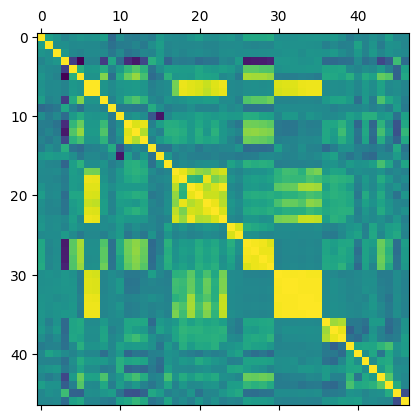

In [24]:
plt.matshow(df.corr())
plt.show()

In [25]:
df_corr = pd.DataFrame({'column1': [], 'column2': [], 'value':[]})
df_corr

,column1,column2,value


In [26]:
t_df = df.corr()
for i in range(len(t_df.columns)):
    c1 = t_df.columns[i]
    for j in range(len(t_df.columns)):
        c2 = t_df.columns[j]
        entry = {'column1':c1, 'column2':c2, 'value': t_df[c1][c2]}
        df_corr = df_corr.append(entry, ignore_index=True)

df_corr

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5592\510344265.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  t_df = df.corr()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5592\510344265.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append(entry, ignore_index=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5592\510344265.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append(entry, ignore_index=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5592\510344265.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

,column1,column2,value
0,Year,Year,1.000000
1,Year,Consumer price index: Food,0.156279
2,Year,Consumer price index: General,0.061521
3,Year,Employment by industry: Agriculture (%) Male a...,-0.055531
4,Year,Employment by industry: Industry (%) Male and ...,0.016147
...,...,...,...
2204,Unemployment rate - Total,"Robbery at the national level, rate per 100,00...",0.004544
2205,Unemployment rate - Total,"Theft at the national level, rate per 100,000 ...",-0.036459
2206,Unemployment rate - Total,"Total Sexual Violence at the national level, r...",-0.048960
2207,Unemployment rate - Total,Labour force participation - Total,-0.470599


In [27]:
df_corr.sort_values('value')

,column1,column2,value
238,Employment by industry: Services (%) Male and ...,Employment by industry: Agriculture (%) Male a...,-0.939948
146,Employment by industry: Agriculture (%) Male a...,Employment by industry: Services (%) Male and ...,-0.939948
715,Current expenditure other than staff compensat...,All staff compensation as % of total expenditu...,-0.829384
485,All staff compensation as % of total expenditu...,Current expenditure other than staff compensat...,-0.829384
153,Employment by industry: Agriculture (%) Male a...,Basic access to computers by level of educatio...,-0.815832
...,...,...,...
1296,Gross enrollment ratio - Secondary (male),Gross enrollment ratio - Secondary (male),1.000000
1248,Gross enrollment ratio - Secondary (female),Gross enrollment ratio - Secondary (female),1.000000
1200,Gross enrollment ratio - Primary (male),Gross enrollment ratio - Primary (male),1.000000
1056,R & D personnel: Technicians - women (number i...,R & D personnel: Technicians - women (number i...,1.000000


In [28]:
df_corr.sort_values('value').to_csv('data/df_corr.csv')

In [29]:
df_filtered = df_corr[ df_corr['column1'] == 'Public expenditure on education (% of GDP)' ].sort_values('value')

In [30]:
df_filtered[ abs(df_filtered['value']) > 0.2 ]

,column1,column2,value
755,Public expenditure on education (% of GDP),Employment by industry: Agriculture (%) Male a...,-0.304996
766,Public expenditure on education (% of GDP),Capital expenditure as % of total expenditure ...,-0.205630
796,Public expenditure on education (% of GDP),"Total Sexual Violence at the national level, r...",0.205826
765,Public expenditure on education (% of GDP),Basic access to computers by level of educatio...,0.211056
779,Public expenditure on education (% of GDP),Gross enrollment ratio - Secondary (male),0.259751
781,Public expenditure on education (% of GDP),Gross enrollment ratio - Upper secondary level...,0.260896
763,Public expenditure on education (% of GDP),Basic access to computers by level of educatio...,0.265374
780,Public expenditure on education (% of GDP),Gross enrollment ratio - Upper secondary level...,0.282918
764,Public expenditure on education (% of GDP),Basic access to computers by level of educatio...,0.291416
778,Public expenditure on education (% of GDP),Gross enrollment ratio - Secondary (female),0.298046


In [31]:
picked_columns = df_filtered[ abs(df_filtered['value']) > 0.2 ]['column2']
picked_columns

755    Employment by industry: Agriculture (%) Male a...
766    Capital expenditure as % of total expenditure ...
796    Total Sexual Violence at the national level, r...
765    Basic access to computers by level of educatio...
779            Gross enrollment ratio - Secondary (male)
781    Gross enrollment ratio - Upper secondary level...
763    Basic access to computers by level of educatio...
780    Gross enrollment ratio - Upper secondary level...
764    Basic access to computers by level of educatio...
778          Gross enrollment ratio - Secondary (female)
757    Employment by industry: Services (%) Male and ...
795    Theft at the national level, rate per 100,000 ...
768           Public expenditure on education (% of GDP)
Name: column2, dtype: object

In [34]:
df_final = df[ picked_columns ].dropna()
df_final

,Employment by industry: Agriculture (%) Male and Female,Capital expenditure as % of total expenditure in public institutions (%),"Total Sexual Violence at the national level, rate per 100,000",Basic access to computers by level of education: Upper secondary,Gross enrollment ratio - Secondary (male),Gross enrollment ratio - Upper secondary level (male),Basic access to computers by level of education: Lower secondary,Gross enrollment ratio - Upper secondary level (female),Basic access to computers by level of education: Primary,Gross enrollment ratio - Secondary (female),Employment by industry: Services (%) Male and Female,"Theft at the national level, rate per 100,000 population",Public expenditure on education (% of GDP)
63,2.6,7.7,91.7,100.0,167.9,239.8,100.0,202.7,100.0,145.9,77.3,2344.8,5.3
115,1.4,3.8,64.8,100.0,146.9,152.6,100.0,180.6,100.0,167.3,75.3,2087.6,6.4
116,1.2,5.0,61.0,100.0,153.6,142.8,100.0,168.7,100.0,174.7,77.4,2186.9,6.5
390,3.9,8.4,42.8,100.0,111.3,113.1,100.0,116.1,100.0,110.8,65.4,863.2,5.1
414,4.8,7.0,36.5,100.0,109.3,116.2,100.0,126.3,100.0,114.3,69.4,2378.4,6.0
415,4.4,6.1,45.0,100.0,105.2,110.2,100.0,120.5,100.0,110.1,72.3,1853.1,6.5
416,4.2,8.8,50.6,100.0,142.9,181.8,100.0,210.2,100.0,157.5,74.0,2233.2,7.0
528,4.9,7.4,8.5,100.0,96.7,93.3,100.0,92.9,100.0,95.8,62.7,1251.8,5.3
529,4.5,10.4,13.0,100.0,97.7,96.8,100.0,96.7,100.0,96.4,64.8,1351.8,4.7
797,3.7,12.7,44.5,100.0,119.5,105.6,100.0,106.7,100.0,117.2,75.2,4631.5,5.1


In [35]:
df_final.shape

(28, 13)